In [50]:
#import pd,np,sklearn,matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')


#print(train_df['Cabin'].value_counts())
#print("  ")
#print(train_df['Embarked'].value_counts())

In [52]:


# fill missing values

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


# split data

train_y = train_df['Survived']
train_x = train_df.drop(['Survived','Name','PassengerId','Ticket'], axis=1)



test_x = test_df.drop(['Name','PassengerId','Ticket'], axis=1)


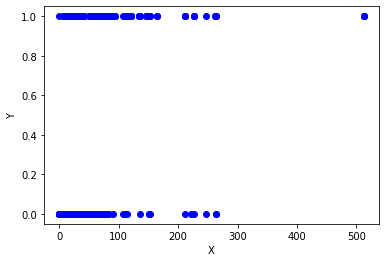

In [53]:
plt.scatter(train_df.Fare, train_df.Survived,  color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



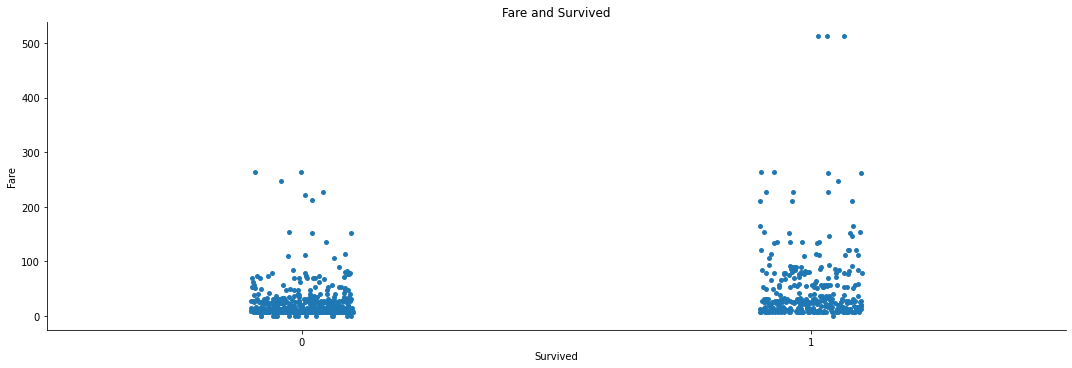

In [54]:
# create catplot with seaborn for Fare and Survived
sns.catplot(y="Fare", x="Survived", data=train_df, kind="strip", height=5, aspect=3) 
plt.ylabel('Fare')
plt.xlabel('Survived')
plt.title('Fare and Survived')
plt.show()

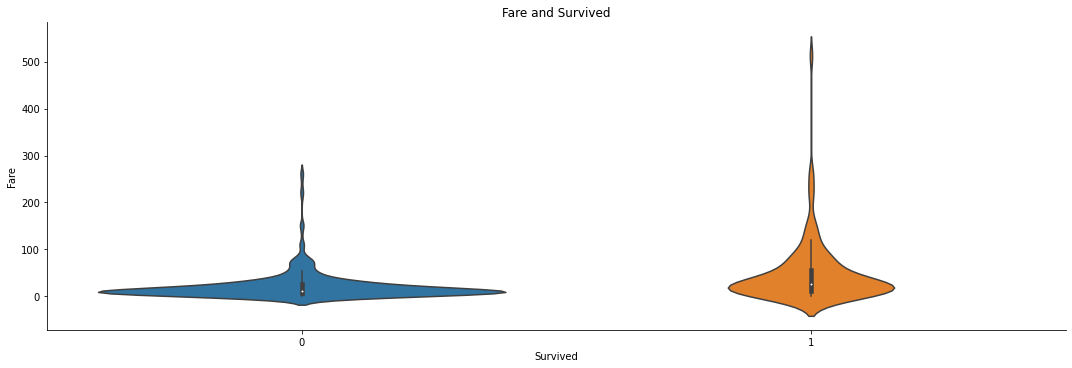

In [55]:
# create catplot with seaborn for Fare and Survived
sns.catplot(y="Fare", x="Survived", data=train_df, kind="violin", height=5, aspect=3) 
plt.ylabel('Fare')
plt.xlabel('Survived')
plt.title('Fare and Survived')
plt.show()

In [56]:
#encode categorical data

train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)



for i in train_x.columns:
    if i not in test_x.columns:
        test_x[i] = 0
for i in test_x.columns:
    if i not in train_x.columns:
        train_x[i] = 0   
        
             
print(train_x.shape)
print(test_x.shape)        

(891, 196)
(418, 196)


C:\Users\khald\AppData\Local\Temp\ipykernel_276\3875053931.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_x[i] = 0
C:\Users\khald\AppData\Local\Temp\ipykernel_276\3875053931.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_x[i] = 0
C:\Users\khald\AppData\Local\Temp\ipykernel_276\3875053931.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

In [57]:
#normalize data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)


print(train_x.shape)
print(test_x.shape)

(891, 196)
(418, 196)


In [58]:
# kkn model to predict survival
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split( train_x, train_y, test_size=0.2, random_state=4)

k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh2   =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',  metric_params=None, n_jobs=1, n_neighbors=k, p=2, weights='uniform')
neigh.fit(X_train, y_train)
neigh2.fit(X_train,y_train)    

#evaluation
yhat = neigh.predict(X_test)
yhat2 = neigh2.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))



Train set Accuracy:  0.8735955056179775
Test set Accuracy:  0.8435754189944135
Train set Accuracy:  0.8735955056179775
Test set Accuracy:  0.8435754189944135


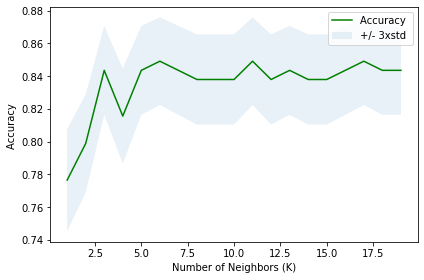

The best accuracy was with 0.8491620111731844 with k= 6


In [59]:
# create a loop that do the same thing for k = 1 to 10 and takes the best k for testing accuracy
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
        
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
        
    
        
        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

#plot the accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


Confusion matrix, without normalization
[[ 42  18]
 [  3 116]]


0.8777794952193787

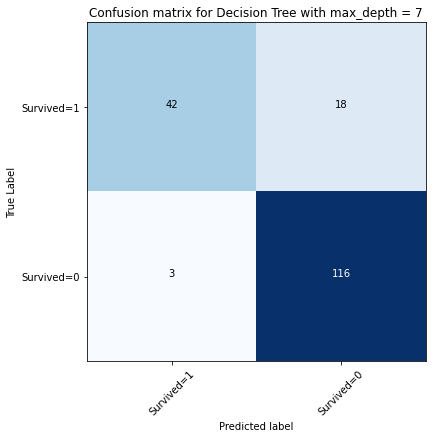

In [60]:
#  decision tree
from sklearn.tree import DecisionTreeClassifier     
from sklearn import metrics 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def DecisionTreeClassifierModel(mx_dpth,ccp_a): 

    drugTree = DecisionTreeClassifier(criterion="gini", max_depth = mx_dpth,ccp_alpha=ccp_a)
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test) 
    ydf = pd.Series(drugTree.predict(test_x))
    ydf = pd.concat([test_df['PassengerId'], ydf], axis=1)
    ydf.to_csv('submission.csv', index=False)


    f1_scor = f1_score(y_test, predTree, average='weighted')
    
    
    #evaluation
    
    #print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
    #print("Jaccard score: ", jaccard_score(y_test, predTree))
    #print("F1-score: ", f1_score(y_test, predTree, average='weighted'))     




    #confusion matrix
    
    
    cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
    np.set_printoptions(precision=2)



    plt.figure(figsize=(6,6)) 
  
    plot_confusion_matrix(mx_dpth,cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')
    return f1_scor
    

def plot_confusion_matrix(awdi,cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for Decision Tree with max_depth = {}'.format(awdi))

    


DecisionTreeClassifierModel(7,0)

#list = []
#for i in range(1,30):
#    if DecisionTreeClassifierModel(i,0)>0.87:
#        list.append(DecisionTreeClassifierModel(i,0))
#        print("max_depth = ",i,"ccp_alpha = ",0)
#        print("")
#    
#print(max(list))    

In [61]:
#  logistic regression 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score

def LogisticRegressionModel(C, solver):
    LR = LogisticRegression(C=C, solver=solver,penalty='elasticnet',max_iter=400,l1_ratio=0.9).fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    #print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat))
    #print("Jaccard score: ", jaccard_score(y_test, yhat))
    #print("F1-score: ", f1_score(y_test, yhat, average='weighted'))
    #print("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))



    return f1_score(y_test, yhat, average='weighted')



for i in np.arange(0.001,1,0.01):
    for j in [   'saga']:

        x =LogisticRegressionModel(i,j)
        
        if x > 0.83:            
            print("C = ",i,"solver = ",j)
            print("")
            print("")
            print('f1_score = ',x)


C =  0.7609999999999999 solver =  saga


f1_score =  0.8343724268452288
C =  0.7709999999999999 solver =  saga


f1_score =  0.8343724268452288
C =  0.7809999999999999 solver =  saga


f1_score =  0.8343724268452288
C =  0.7909999999999999 solver =  saga


f1_score =  0.8343724268452288
C =  0.8009999999999998 solver =  saga


f1_score =  0.8343724268452288
C =  0.8109999999999998 solver =  saga


f1_score =  0.8343724268452288


In [62]:
# SVM

from sklearn import svm


def SVMModel(ker,degr): 
    clf = svm.SVC(C=0.76,kernel=ker, degree=degr)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    #print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))
    #print("Jaccard score: ", jaccard_score(y_test, yhat))
    #print("F1-score: ", f1_score(y_test, yhat, average='weighted'))
    return f1_score(y_test, yhat, average='weighted')

for i in ['poly','rbf']:
    for j in range(1,5):
        x = SVMModel(i,j)
        if x > 0.80:
            print("kernel = ",i,"degree = ",j)
            print("")
            print("")
            print('f1_score = ',x)

kernel =  poly degree =  1


f1_score =  0.8125659479196831


In [63]:
#  random forest

from sklearn.ensemble import RandomForestClassifier


def RandomForestModel(n_est,ccp_a):
    clf = RandomForestClassifier(n_estimators=n_est, ccp_alpha=ccp_a)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    #print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, yhat))
    #print("Jaccard score: ", jaccard_score(y_test, yhat))
    #print("F1-score: ", f1_score(y_test, yhat, average='weighted'))
    return f1_score(y_test, yhat, average='weighted')

for i in range(1,100):  
    x = RandomForestModel(i,0)
    if x > 0.87:
        print("n_estimators = ",i)
        print("")
        print("")
        print('f1_score = ',x)

In [64]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

def NaiveBayesModel():
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    #print("Naive Bayes's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    #print("Jaccard score: ", jaccard_score(y_test, y_pred))
    #print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))
    return f1_score(y_test, y_pred, average='weighted')


x = NaiveBayesModel()
print('f1_score = ',x)  


f1_score =  0.6230808297847403


In [65]:
#  neural network with tensorflow

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K

 
 
# prepre data for input shape




 
def NeuralNetworkModel():
    model = keras.Sequential([
    layers.Dense(160, activation='relu', input_shape=[(X_train.shape[1])]),
    layers.Dense(110, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=300, verbose=0)
    model.summary()
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    #print("Neural Network's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    #print("Jaccard score: ", jaccard_score(y_test, y_pred))
    #print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))
    return f1_score(y_test, y_pred, average='weighted')


x = NeuralNetworkModel()    
print('f1_score = ',x)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 160)               31520     
                                                                 
 dense_29 (Dense)            (None, 120)               19320     
                                                                 
 dense_30 (Dense)            (None, 5)                 605       
                                                                 
 dense_31 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 2ms/step
f1_score =  0.7780657735789044
